In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import load_iris    # built-in data
from sklearn.model_selection import train_test_split    # train, test 데이터 분할
# from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso # 선형 회귀 분석
# from sklearn.metrics import r2_score, mean_squared_error


# 확률을 통해 예측
from sklearn.linear_model import LogisticRegression, SGDClassifier # 로지스틱 회귀 분석 / 선형 분류
from sklearn.metrics import RocCurveDisplay, roc_auc_score

independent var : 4개 선택

dependent var : 품종 (class)  문자열 -> 숫자로 변환

분류기 만들어보기

In [3]:
pd_data = pd.read_csv('./Raisin_Dataset.CSV', encoding='cp949')

class_num = 0
for name in pd_data['Class'].unique() :
    pd_data.replace(name, class_num, inplace=True)
    class_num+=1

pd_data = pd_data.iloc[:, [0,1,2,3,7]]

pd_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Class
0,87524,442.246011,253.291155,0.819738,0
1,75166,406.690687,243.032436,0.801805,0
2,90856,442.267048,266.328318,0.798354,0
3,45928,286.540559,208.760042,0.684989,0
4,79408,352.190770,290.827533,0.564011,0


In [4]:
X = pd_data.iloc[:,:4]
y = pd_data.iloc[:,-1]

print(X)
print(y)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity
0    87524       442.246011       253.291155      0.819738
1    75166       406.690687       243.032436      0.801805
2    90856       442.267048       266.328318      0.798354
3    45928       286.540559       208.760042      0.684989
4    79408       352.190770       290.827533      0.564011
..     ...              ...              ...           ...
895  83248       430.077308       247.838695      0.817263
896  87350       440.735698       259.293149      0.808629
897  99657       431.706981       298.837323      0.721684
898  93523       476.344094       254.176054      0.845739
899  85609       512.081774       215.271976      0.907345

[900 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
895    1
896    1
897    1
898    1
899    1
Name: Class, Length: 900, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

m = LogisticRegression(solver='liblinear')

m.fit(X_train, y_train)

print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
print('test target', y_test)

train score :  0.8562962962962963
test score :  0.8533333333333334
test pred :  [1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 0]
test target 836    1
666    1
237    0
842    1
430    0
      ..
340    0
649    1
239    0
538    1
635    1
Name: Class, Length: 225, dtype: int64


In [6]:
# SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

m = SGDClassifier(loss='log_loss')

m.fit(X_train, y_train)

print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
print('test target', y_test)

train score :  0.49925925925925924
test score :  0.5022222222222222
test pred :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
test target 836    1
666    1
237    0
842    1
430    0
      ..
340    0
649    1
239    0
538    1
635    1
Name: Class, Length: 225, dtype: int64


(array([0, 1], dtype=int64), array([112, 113], dtype=int64))
0.8533333333333334
0.9125316055625791


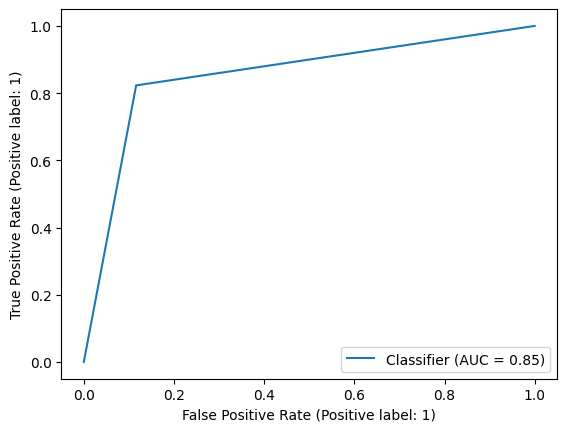

In [7]:
# ROC 그리기

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)


# print(y)

# print(y_test)
print(np.unique(y_test, return_counts=True))

# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
m = LogisticRegression(solver='liblinear') 

m.fit(X_train, y_train)

print(m.score(X_test, y_test))

RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

roc_auc = roc_auc_score(y_test, m.decision_function(X_test))
# roc_auc = roc_auc_score(y_test, m.predict_proba(X_test)[:, 1])
print(roc_auc)
